<a href="https://colab.research.google.com/github/fay421/ML_Projects/blob/main/UMAP_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## UMAP - MNIST

## About UMAP:

UMAP, which stands for Uniform Manifold Approximation and Projection, is a dimensionality reduction and manifold learning technique used in machine learning and data analysis. It was introduced as an alternative to t-SNE (t-Distributed Stochastic Neighbor Embedding) and PCA (Principal Component Analysis) for visualizing and analyzing high-dimensional data. UMAP is particularly effective at preserving the global structure of the data while reducing its dimensionality.


*   Non-linearity: UMAP is a non-linear dimensionality reduction technique, which means it can capture complex relationships in the data that linear techniques like PCA cannot. It is well-suited for data with nonlinear patterns.

*   Preserving local and global structure: UMAP aims to preserve both local and global structure in the data. Local relationships are maintained by considering the nearest neighbors of each data point, while global relationships are captured by optimizing a low-dimensional representation of the entire dataset.

*   Scalability: UMAP can efficiently handle large datasets and is designed to be computationally scalable, making it suitable for big data applications.
*   Versatility: UMAP can be used for a variety of tasks, including visualization, clustering, and even feature engineering. It is commonly used in exploratory data analysis (EDA) and preprocessing stages of machine learning pipelines.

*   Parameter tuning: UMAP offers several hyperparameters that can be tuned to control the trade-off between preserving local and global structure, which makes it adaptable to different types of datasets.

*   Open-source library: UMAP is implemented in Python and is available as an open-source library. It can be easily integrated into your data analysis or machine learning workflows.












## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler

## Get Dataset

In [4]:
!gdown --id 1BHByvjaeWcOMQ43G9aG320Jgm5bUf_-l

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1BHByvjaeWcOMQ43G9aG320Jgm5bUf_-l
To: /content/MNIST.zip
100% 16.0M/16.0M [00:00<00:00, 54.8MB/s]


In [5]:
!unzip MNIST.zip

Archive:  MNIST.zip
  inflating: mnist_test.csv          
  inflating: mnist_train.csv         


## Create DataFrame

In [29]:
df = pd.read_csv('mnist_train.csv')

## EDA

In [30]:
df.head(10)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df.shape

(60000, 785)

## Craete Data and Label

In [45]:
y = df['label']
X = df.drop('label',axis = 1)

## Minimize Data

In [46]:
y = y.iloc[:2000]
X = X.iloc[:2000,:]

In [47]:
print('X_Shape: ', X.shape)
print('X_type:', type(X))

X_Shape:  (2000, 784)
X_type: <class 'pandas.core.frame.DataFrame'>


In [48]:
X = X.to_numpy()

## Visualization

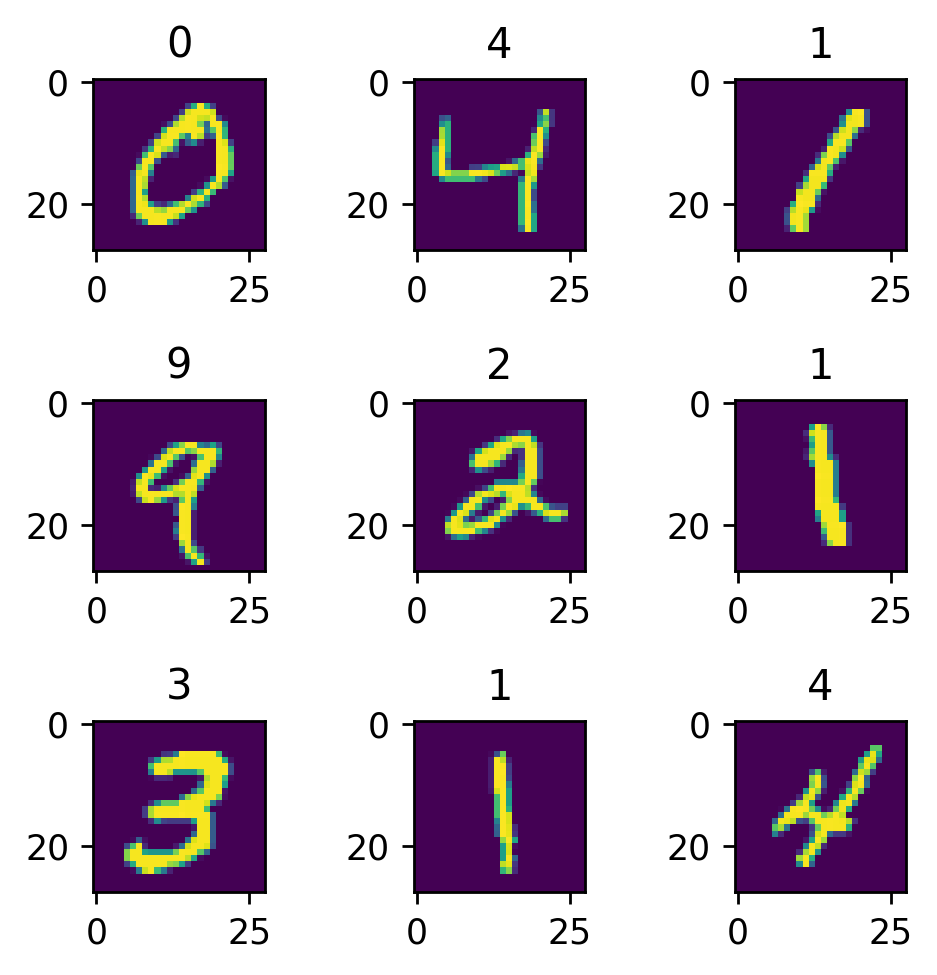

In [49]:
plt.figure(figsize=(4,4),dpi = 250)
for i in range(1,10):
  plt.subplot(3,3, i)
  im =X[i,:].reshape(28,28)
  plt.imshow(im)
  plt.title(y[i])
plt.tight_layout()

## Scale

In [50]:
from sklearn.preprocessing import StandardScaler

In [52]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

## UMAP


In [53]:
!pip install umap-learn

In [54]:
from umap import UMAP

In [57]:
ump = UMAP(n_components=2)

In [58]:
X_umap = ump.fit_transform(X_sc)

## Scatter Plot

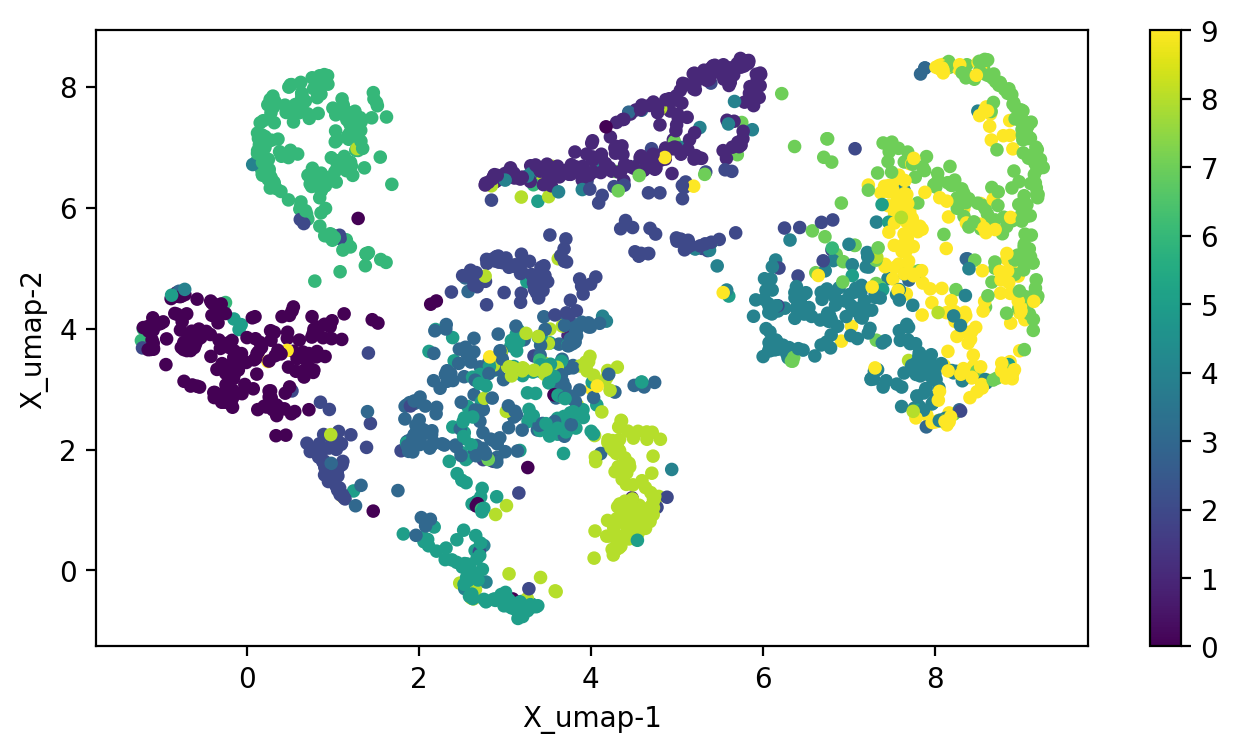

In [64]:
plt.figure(figsize=(8,4),dpi=200)
plt.scatter(X_umap[:,0],X_umap[:,1],s = 15 , c = y)
plt.colorbar()
plt.xlabel('X_umap-1')
plt.ylabel('X_umap-2')
plt.show()

## Conclusion:


The UMAP plot with the MNIST dataset then provides a two-dimensional representation of the dataset's images, which consist of handwritten digits from 0 to 9. Each point represents a different image, and the color corresponds to the actual digit that the image represents. Here's what this information tells us about the plot:


*   Clusters: Each cluster in the plot likely represents one of the ten digits in the MNIST dataset. The points within each cluster are images of the same digit.

*   Separation: The degree to which the clusters are separated from each other shows how well the UMAP algorithm has managed to distinguish between the different digits based only on the pixel data of the images.
*   Overlap: Some overlap between clusters could indicate digits that are visually similar, such as '4' and '9' or '3' and '8', which might be harder to distinguish based on their written forms.
*   Color Code: The color bar on the side indicates which colors correspond to which digits. This is useful for identifying which cluster corresponds to which digit.



*   Dimensionality Reduction: The MNIST dataset images are originally 28x28 pixels, which means each image has 784 dimensions. UMAP has reduced this to just 2 dimensions, allowing us to visualize the data's structure.

### Since we know this plot represents the MNIST dataset, we can conclude that the UMAP algorithm has successfully captured the underlying structure of the dataset by grouping similar digits together. The X and Y axes ('X_umap-1' and 'X_umap-2') represent the two principal components that UMAP has identified as the most important features after reducing the dimensionality of the data.